In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
dataset = pd.read_csv('heart_disease_uci.csv')


In [ ]:
dataset.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
# Mengisi nilai NaN dengan rata-rata kolom numerik
numeric_cols = dataset.select_dtypes(include=[np.number]).columns
dataset[numeric_cols] = dataset[numeric_cols].fillna(dataset[numeric_cols].mean())

# Mengubah variabel kategori menjadi numerik menggunakan LabelEncoder
le = LabelEncoder()

dataset['sex'] = le.fit_transform(dataset['sex'])
dataset['cp'] = le.fit_transform(dataset['cp'])
dataset['restecg'] = le.fit_transform(dataset['restecg'])
dataset['thal'] = le.fit_transform(dataset['thal'])

In [ ]:
# Memilih fitur (variabel independen) dan target (variabel dependen)
x = dataset[['age', 'sex', 'trestbps', 'chol', 'thalch', 'oldpeak']].values  # Fitur
y = dataset['num'].values  # Target

# Membagi data menjadi data latih dan uji (75% latih, 25% uji)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)


In [ ]:
# Normalisasi data fitur
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
classifier = GaussianNB()

# Melatih model dengan data latih
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("Hasil Prediksi Pertama (5 Data):")
print(y_pred[:5])

Hasil Prediksi Pertama (5 Data):
[0 2 0 0 0]


In [ ]:
# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[84 14  4  4  0]
 [21 24  9  8  0]
 [ 7 13  6  7  1]
 [ 2  3  7  7  1]
 [ 1  1  3  2  1]]


In [ ]:
# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi: {accuracy * 100:.2f}%')

Akurasi: 53.04%


<ipython-input-16-c3cd00f6b501>:17: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


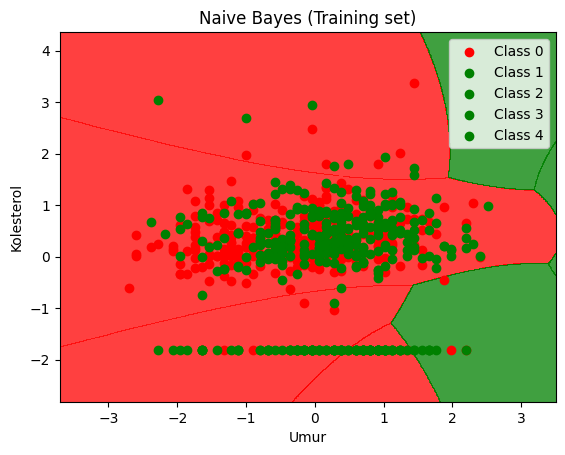

In [ ]:
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt

# Asumsikan `classifier_vis` sudah dilatih dengan dua fitur
# Visualisasi Training Set
x_set, y_set = x_train_vis, y_train
x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01))

plt.contourf(x1, x2, classifier_vis.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=f'Class {j}')

plt.title('Naive Bayes (Training set)')
plt.xlabel('Umur')
plt.ylabel('Kolesterol')
plt.legend()
plt.show()


<ipython-input-17-938f915d801a>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


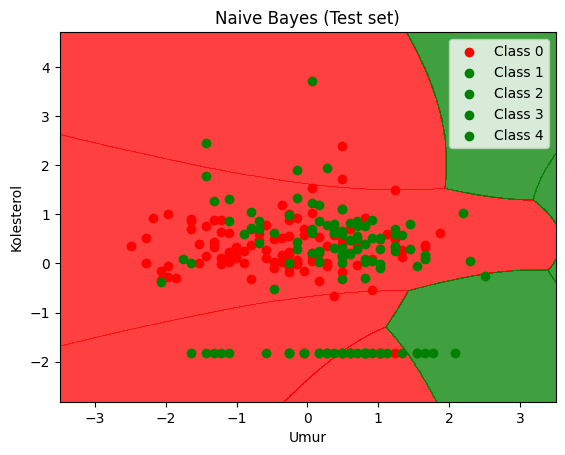

In [ ]:
x_set, y_set = x_test_vis, y_test
x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01))

plt.contourf(x1, x2, classifier_vis.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=f'Class {j}')

plt.title('Naive Bayes (Test set)')
plt.xlabel('Umur')
plt.ylabel('Kolesterol')
plt.legend()
plt.show()